# Predicting Check-ins of Foursquare Users in Tokyo

## 5 - Machine Learning

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils.multiclass import unique_labels
import itertools

%matplotlib inline

In [2]:
# Setup default matplotlib defaults for later use
def defaultsettings():
    rcParams.update(matplotlib.rcParamsDefault)
    sns.set_style()
    sns.set_context()
    %matplotlib inline

In [3]:
# Setup Seaborn settings for bar plots
def postersettings():
    rcParams.update(matplotlib.rcParamsDefault)
    sns.set_style("whitegrid")
    sns.set_context("poster")

In [4]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

In [5]:
# Load X for Layer 0.
df_X0 = pd.read_csv('df_X0.csv',
                    index_col = 0,
                    parse_dates = [0],
                    date_parser = pd.to_datetime,
                    infer_datetime_format = True)

In [6]:
df_X0.head()

,poweruser_0,poweruser_1,poweruser_2,weekday_morning,weekday_afternoon,weekday_evening,weekend_morning,weekend_afternoon,weekend_evening,train_nearby,subway_nearby,y0,y1
timestamp,,,,,,,,,,,,,
2012-04-04 03:17:18,False,False,True,True,False,False,False,False,False,True,False,2,129
2012-04-04 03:22:04,False,False,True,True,False,False,False,False,False,False,False,2,2
2012-04-04 04:12:07,False,False,True,True,False,False,False,False,False,False,False,2,3
2012-04-04 04:12:13,False,False,True,True,False,False,False,False,False,False,False,2,6
2012-04-04 04:18:23,False,False,True,True,False,False,False,False,False,False,False,2,212


In [7]:
Xtrain0 = df_X0['2012-July':'2013-Jan'].drop(['y0', 'y1'], axis = 1)
Xtest0 = df_X0['2013-Feb':].drop(['y0', 'y1'], axis = 1)
ytrain0 = df_X0['2012-July':'2013-Jan'].y0
ytest0 = df_X0['2013-Feb':].y0

clf_LR0 = LogisticRegression()
clf_LR0.fit(Xtrain0, ytrain0)
ypred0 = clf_LR0.predict(Xtest0)
print("Accuracy: {0:.2f}%".format(accuracy_score(ytest0, ypred0) * 100))

Accuracy: 83.15%


Normalized confusion matrix
[[ 0.84  0.01  0.14]
 [ 0.1   0.56  0.34]
 [ 0.11  0.03  0.86]]


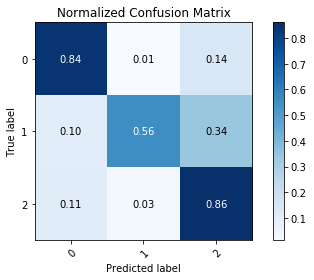

In [8]:
defaultsettings()

plot_confusion_matrix(ytest0.values, ypred0, classes = [0, 1, 2], normalize = True,
                      title='Normalized Confusion Matrix')

plt.show()

Confusion matrix, without normalization
[[ 8044   124  1355]
 [  216  1158   710]
 [ 1648   444 12982]]


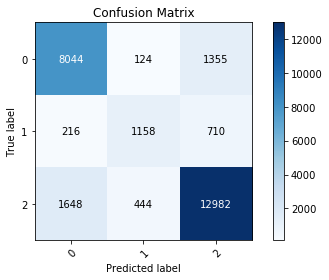

In [9]:
defaultsettings()

plot_confusion_matrix(ytest0.values, ypred0, classes = [0, 1, 2], normalize = False,
                      title='Confusion Matrix')

plt.show()

In [10]:
print(classification_report(list(ytest0), list(ypred0), target_names = ["0", "1", "2"]))

             precision    recall  f1-score   support

          0       0.81      0.84      0.83      9523
          1       0.67      0.56      0.61      2084
          2       0.86      0.86      0.86     15074

avg / total       0.83      0.83      0.83     26681



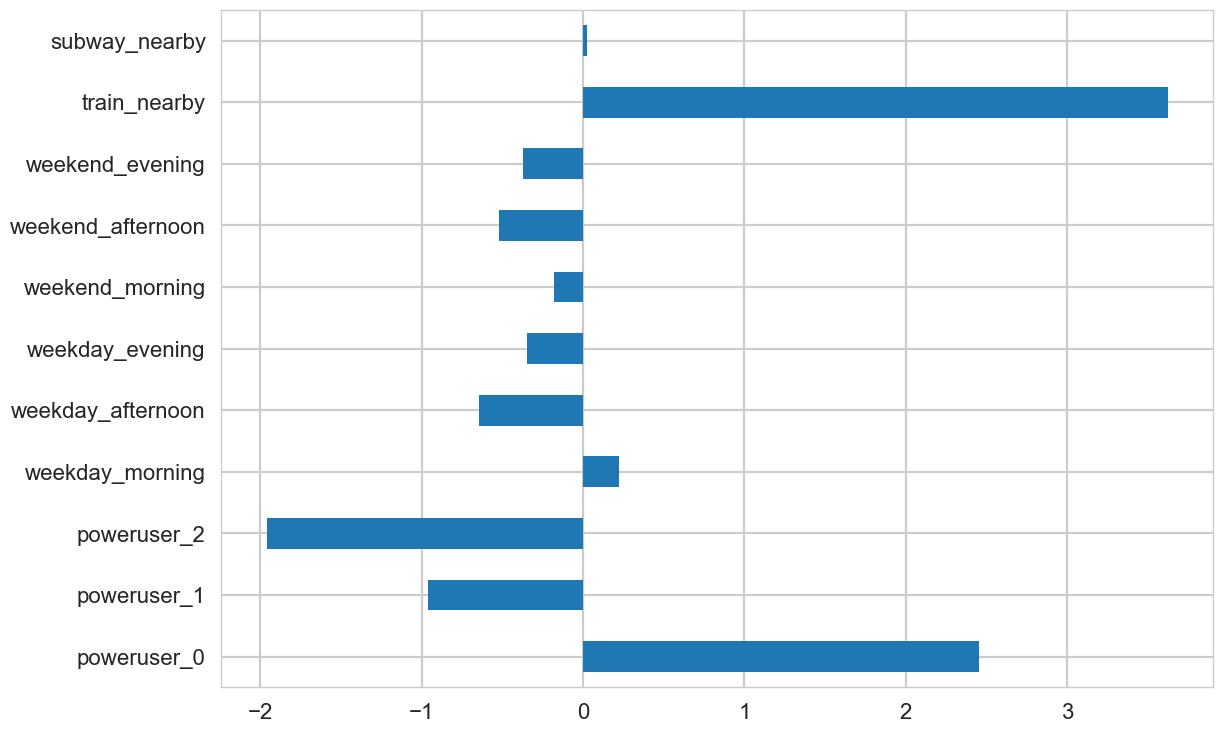

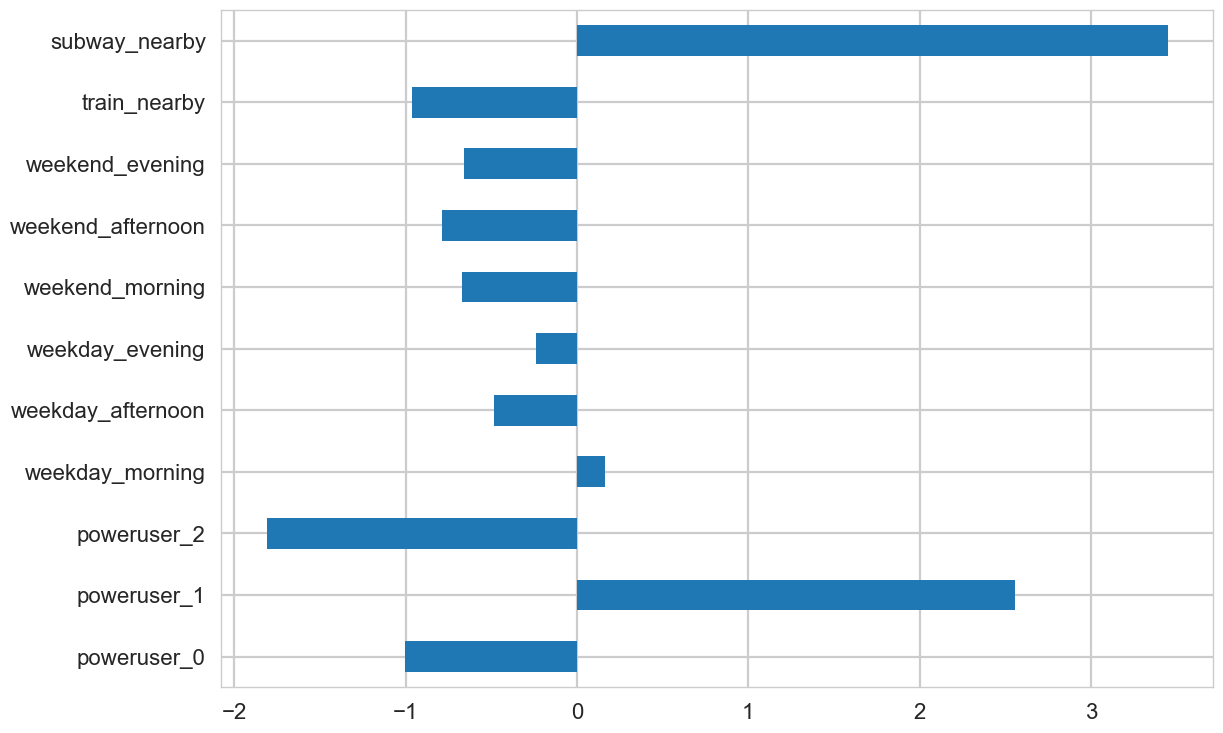

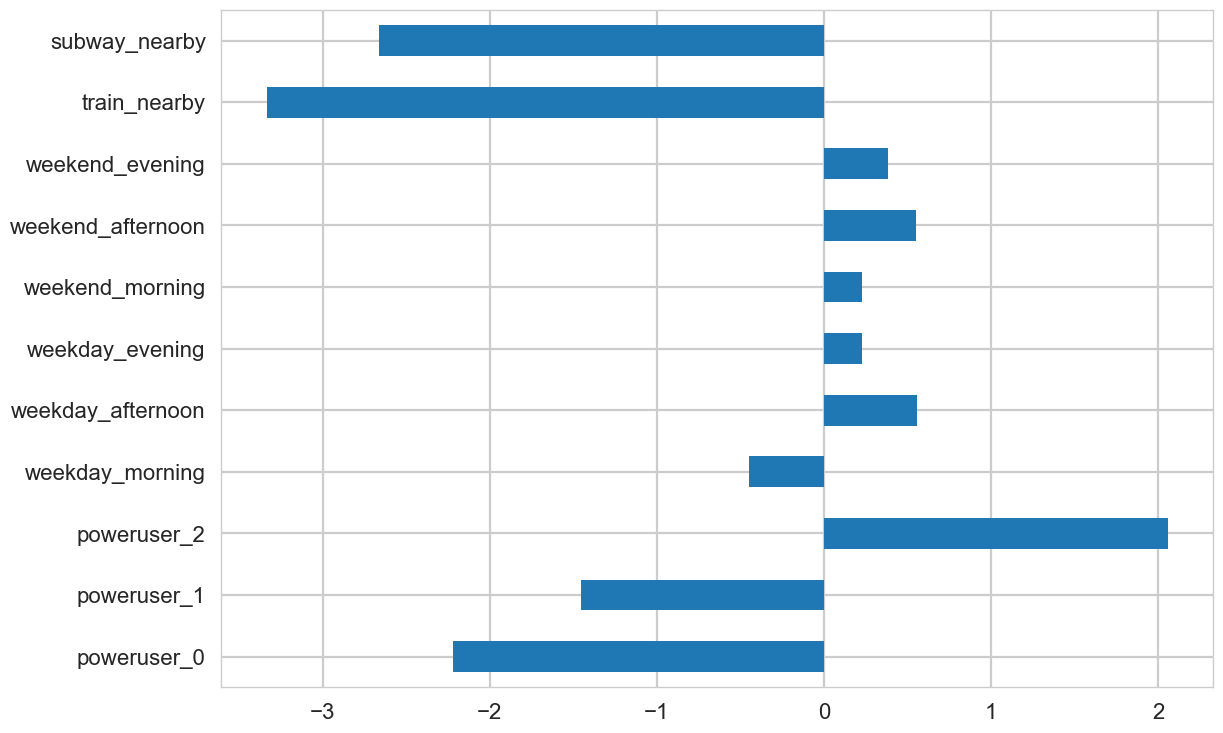

In [11]:
postersettings()

for coef in clf_LR0.coef_:
    plt.figure()
    pd.Series(coef, index = Xtrain0.columns).plot(kind = "barh")

In [12]:
pd.DataFrame({"ytest0": ytest0, "ypred0": ypred0}).to_csv("layer0_results.csv")